In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import shapely.geometry as sgeom

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

<function lambert_yticks.<locals>.<lambda> at 0x00000209AAA26C10>


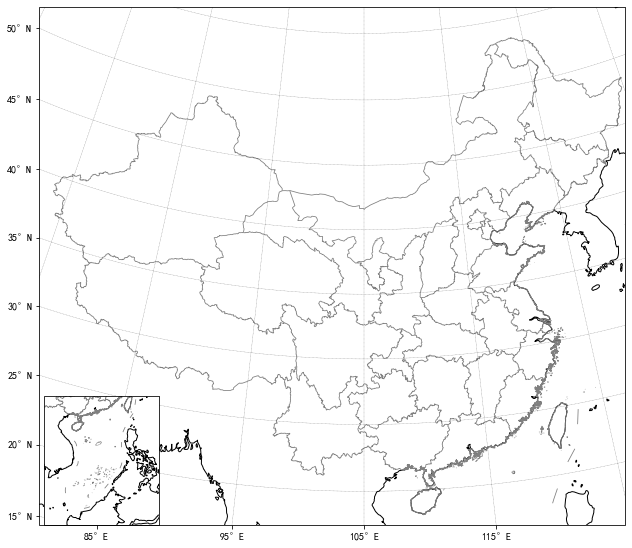

In [2]:
def find_side(ls, side):
    """
 Given a shapely LineString which is assumed to be rectangular, return the
 line corresponding to a given side of the rectangle.

    """
    # print(ls.bounds)
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])

def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    print(lc)
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    # outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    outline_patch = sgeom.LineString(ax.spines['geo'].get_path().vertices.tolist())
    # print(dir(outline_patch))
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

# 中国和南海的范围
box1 = [80, 125, 17.5, 55]
box2 = [105, 125, 0, 25]# 中国和南海的范围
box1 = [80, 125, 17.5, 55]
box2 = [105, 125, 0, 25]
proj = ccrs.LambertConformal(central_longitude=105, central_latitude=90,false_easting=400000, false_northing=400000)
fig = plt.figure(figsize=(16,9),frameon=True)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=proj)
ax1.coastlines('50m')
ax1.add_geometries(Reader('D:\\maplist\\China_province\\bou2_4l.shp').geometries(), ccrs.PlateCarree(),
                   facecolor='none', edgecolor='gray', linewidth=0.8)
ax1.set_extent(box1, crs=ccrs.PlateCarree())
##############
fig.canvas.draw()  # 必要的
##############
# 坐标刻度的绘制
xticks = [55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165]
yticks = [0 , 5 , 10, 15, 20, 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60 , 65]
ax1.gridlines(xlocs=xticks, ylocs=yticks, linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax1, xticks)
lambert_yticks(ax1, yticks)

## 南海子图的绘制
ax2 = fig.add_axes([0.25, 0.05, 0.1, 0.3], projection=ccrs.LambertConformal(central_latitude=90,
                                                       central_longitude=115))
ax2.coastlines('50m')
ax2.set_extent(box2, crs=ccrs.PlateCarree())
ax2.add_geometries(Reader('D:\\maplist\\China_province\\bou2_4l.shp').geometries(), ccrs.PlateCarree(),
                   facecolor='none', edgecolor='gray', linewidth=0.8)

In [ ]:
plt.savefig('D:\\python\\hh.png')

D:\Temp\ipykernel_8500\4102676025.py:46: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())


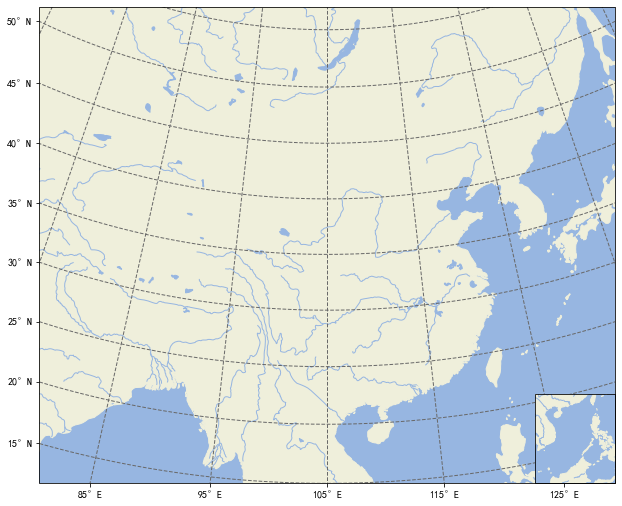

In [3]:

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from copy import copy
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import shapely.geometry as sgeom



def find_side(ls, side):
    """
 Given a shapely LineString which is assumed to be rectangular, return the
 line corresponding to a given side of the rectangle.

 """
    # print(ls.bounds)
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])

def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels


# Load the border data, CN-border-La.dat is downloaded from
# https://gmt-china.org/data/CN-border-La.dat
# with open('CN-border-La.dat') as src:
#     context = src.read()
#     blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
#     borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]


# Set figure size
proj = ccrs.LambertConformal(central_longitude=105, central_latitude=90,
                             false_easting=400000, false_northing=400000)#,standard_parallels=(46, 49))

fig = plt.figure(figsize=[10, 8],frameon=True)


# Set projection and plot the main figure
ax = fig.add_axes([0.08, 0.05, 0.8, 0.94], projection=proj)
# Set figure extent
ax.set_extent([80, 130, 15, 55],crs=ccrs.PlateCarree())

# # Plot border lines
# for line in borders:
#     ax.plot(line[0::2], line[1::2], '-', lw=1.5, color='k',
#             transform=ccrs.Geodetic())

# Add ocean, land, rivers and lakes
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))


# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
# xticks = np.arange(80,130,10)
# yticks = np.arange(15,55,5)
xticks = [55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165]
yticks = [0 , 5 , 10, 15, 20, 25 , 30 , 35 , 40 , 45 , 50 , 55 , 60 , 65]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--',lw=1,color='dimgrey')

# Label the end-points of the gridlines using the custom tick makers:
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)


#Plot South China Sea as a subfigure
sub_ax = fig.add_axes([0.754, 0.107, 0.14, 0.155],
                      projection=ccrs.LambertConformal(central_latitude=90,
                                                       central_longitude=115))
# Add ocean, land, rivers and lakes
sub_ax.add_feature(cfeature.OCEAN.with_scale('50m'))
sub_ax.add_feature(cfeature.LAND.with_scale('50m'))
sub_ax.add_feature(cfeature.RIVERS.with_scale('50m'))
sub_ax.add_feature(cfeature.LAKES.with_scale('50m'))
# Plot border lines
# for line in borders:
#     sub_ax.plot(line[0::2], line[1::2], '-', lw=1, color='k',
#                 transform=ccrs.Geodetic())
# Set figure extent
sub_ax.set_extent([105, 125, 0, 25],crs=ccrs.PlateCarree())

# Show figure
plt.savefig("China_nine_lines_lambert.png", dpi=500, bbox_inches='tight')
plt.show()